# CAPSTONE TWO: DATA WRANGLING

## RENTAL PRICES IN NYC

FILL IN LATER

## 1A. DATA EXPLORATION - Rent Prices from Zillow


### DATASET 1 - Rent Prices

This dataset has: **Rent Prices for apartments in New York City 2020**, imported from zillow.com. The original dataset can be found on kaggle.com. [https://www.kaggle.com/sab30226/zillow-rents-2020]

- It has 22 Columns and 6724 Unique Rows


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# Importing Rent Prices and converting into DataFrame

df = pd.read_csv (r'Rent Prices.csv')
df.head()

,yearBuilt,url,longitude,homeStatus,real estate provider,paymentPeriod,isListed,relaxed,postal_code,title,...,currency,commute,price,latitude,city,homeType,state,bedrooms,bathrooms,area
0,-1.0,https://www.zillow.com/homedetails/Pond-View-R...,-72.887540,FOR_RENT,NaN,NaN,NaN,False,5340.0,Apartment for rent,...,USD,NaN,"$4,000/mo",43.137640,Winhall,APARTMENT,VT,4.0,4.0,2600.0
1,1970.0,https://www.zillow.com/homedetails/17-Stratton...,-72.896810,FOR_RENT,NaN,NaN,NaN,False,5340.0,Condo for rent,...,USD,NaN,"$8,500/mo",43.135276,Winhall,CONDO,VT,3.0,2.0,1100.0
2,1988.0,https://www.zillow.com/homedetails/F6-Cobble-R...,-72.863105,FOR_RENT,NaN,NaN,NaN,False,5340.0,Condo for rent,...,USD,NaN,"$27,000/mo",43.181144,Winhall,CONDO,VT,3.0,3.0,2420.0
3,1980.0,https://www.zillow.com/homedetails/12-Sap-Buck...,-72.915100,FOR_RENT,NaN,NaN,NaN,False,5340.0,House for rent,...,USD,NaN,"$23,000/mo",43.159800,Winhall,SINGLE_FAMILY,VT,4.0,3.0,1950.0
4,NaN,https://www.zillow.com/b/84-romaine-ave-jersey...,-74.068917,NaN,NaN,NaN,NaN,False,NaN,For Rent,...,NaN,NaN,NaN,40.732659,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Finding number of null values

df.isna().sum()

yearBuilt               1420
url                        0
longitude                  0
homeStatus              1420
real estate provider    6954
paymentPeriod           6954
isListed                6954
relaxed                    0
postal_code             1420
title                      0
address                    0
facts and features         0
currency                1420
commute                 6954
price                   1430
latitude                   0
city                    1420
homeType                1420
state                   1420
bedrooms                1429
bathrooms               1509
area                    4022
dtype: int64

Although there is alot of missing information, one that sticks out right away is the Area.We will explore the **relationship between area and rent cost later**, but we assume this to be important. 

Some columns we can elimate right away because there is no information in them. These columns are listed below:
- real estate provider
- paymentPeriod
- isListed
- commute

The following columns can be eliminated because they do not have any information pertaining to our data.
- relaxed
- url

In [4]:
# Dropping unnecessary columns, that have too much missing data.

df = df.drop(['url', 'real estate provider', 'isListed', 'relaxed', 'commute', 'paymentPeriod'], axis=1)

In [5]:
# Finding if currency is relevant information:

df.currency.nunique()

1

We can remove the currency column; since it does not add anything useful, as it has one currency ($). Next we'll remove all Rent Prices that are not in New York since our client is only interisted in renting in New York.

In [6]:
# Removing all Rent Prices that are not  from NY

df = df[df['state']=='NY']

In [7]:
# Exploring the facts and features column:

df['facts and features'].head()

68    3 bds, 1.0 ba ,1375 sqft
80     0 bds, 1.0 ba ,550 sqft
87     1 bds, 1.0 ba ,500 sqft
93    0 bds, 1.0 ba ,None sqft
95     1 bds, 1.0 ba ,893 sqft
Name: facts and features, dtype: object

This column does not add anything since all these features and facts have their own column.

In [8]:
df.city.unique()

array(['Maspeth', 'Bayside', 'New York', 'Manhattan', 'Staten Island',
       'Bronx', 'Mount Vernon', 'Yonkers', 'Floral Park', 'Queens',
       'South Floral Park', 'Glen Oaks', 'Long Island City', 'Astoria',
       'Sunnyside', 'Brooklyn', 'Flushing', 'College Point', 'Whitestone',
       'Auburndale', 'Little Neck', 'Douglaston', 'Oakland Gardens',
       'Bayside Hills', 'Fresh Meadows', 'Kew Gardens Hills', 'Corona',
       'East Elmhurst', 'East Elhurst', 'Jackson Heights', 'Elmhurst',
       'Rego Park', 'Forest Hills', 'Woodside', 'Middle Village',
       'Ridgewood', 'Glendale', 'Cambria Heights', 'Jamaica',
       'Saint Albans', 'Spingfield Gardends', 'Springfield Gardens',
       'Laurelton', 'Rosedale', 'Howard Beach', 'Kew Gardens',
       'Ozone Park', 'Richmond Hill', 'South Richmond Hill',
       'South Ozone Park', 'S Ozone Park', 'Woodhaven', 'Hollis',
       'Bellerose', 'Bellerose North', 'Queens Village', 'Briarwood',
       'Atlantic Beach', 'Valley Stream', 'Fa

City will also not be used. By observing the unique values we can see that they range from Manhattan to New York; which are too broad for our purposes. The information does not line up with Neighborhood DataFrame we will use later, therefore we will remove this column and determine the Neighborhood by Postal Code. Neighbrohood will give us a more accurate interpretation of our data; and will hopefully lead to a more accurate algorithm.

In [9]:
df.columns

Index(['yearBuilt', 'longitude', 'homeStatus', 'postal_code', 'title',
       'address', 'facts and features', 'currency', 'price', 'latitude',
       'city', 'homeType', 'state', 'bedrooms', 'bathrooms', 'area'],
      dtype='object')

In [10]:
len(df[df.yearBuilt == -1.0].index)

4190

Unfortunately, we will also have to drop year built as only one third of the data has a year built associated with it. 

In [11]:
# Dropping unnecessary columns

df = df.drop(['homeStatus','currency','facts and features','state','city', 'yearBuilt'], axis=1)

In [12]:
# Assessing our new DataFrame

df.head()

,longitude,postal_code,title,address,price,latitude,homeType,bedrooms,bathrooms,area
68,-73.905143,11378.0,Apartment for rent,"6155 60th Pl, Maspeth, NY 11378","$2,650/mo",40.719532,APARTMENT,3.0,1.0,1375.0
80,-73.767100,11361.0,House for rent,"217th St, Bayside, NY 11361","$1,250/mo",40.769070,SINGLE_FAMILY,0.0,1.0,550.0
87,-73.996217,10001.0,Apartment for rent,"247 W 26th St APT 5B, New York, NY 10001","$2,500/mo",40.747067,MULTI_FAMILY,1.0,1.0,500.0
93,-73.997605,10001.0,Apartment for rent,"358 W 30th St APT 2B, New York, NY 10001","$2,350/mo",40.750397,MULTI_FAMILY,0.0,1.0,NaN
95,-74.001715,10001.0,Apartment for rent,"420 W 25th St APT 7K, New York, NY 10001","$5,900/mo",40.748087,MULTI_FAMILY,1.0,1.0,893.0


In [13]:
# Finding Unique Postal Codes: 

num_pc = df.postal_code.nunique()
print(num_pc)

182


In [14]:
# Creating a Neighborhood COLUMN; which will be added later: 

df['Neighborhood'] = pd.NaT

In [15]:
# Converting all FLOAT to INTERGERS

df.postal_code = pd.to_numeric(df.postal_code, errors='coerce')
df.bedrooms = pd.to_numeric(df.bedrooms, errors='coerce')
df.bathrooms = pd.to_numeric(df.bathrooms, errors='coerce')
df.area = pd.to_numeric(df.area, errors='coerce')

In [16]:
# RENAMING COLUMNS

df.rename(columns={'postal_code':'Postal_Code', 'title':'Unit_Type', 'address':'Address', 'price':'Rent', 'homeType':'Home_Type', 'bedrooms':'Bedroom_Num', 'bathrooms':'Bathroom_Num', 'area':'Area_SqFt'}, inplace=True)

In [17]:
df.Home_Type.unique()

array(['APARTMENT', 'SINGLE_FAMILY', 'MULTI_FAMILY', 'TOWNHOUSE', 'CONDO',
       'LOT'], dtype=object)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5431 entries, 68 to 6873
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   longitude     5431 non-null   float64       
 1   Postal_Code   5431 non-null   float64       
 2   Unit_Type     5431 non-null   object        
 3   Address       5431 non-null   object        
 4   Rent          5421 non-null   object        
 5   latitude      5431 non-null   float64       
 6   Home_Type     5431 non-null   object        
 7   Bedroom_Num   5422 non-null   float64       
 8   Bathroom_Num  5342 non-null   float64       
 9   Area_SqFt     2849 non-null   float64       
 10  Neighborhood  0 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 509.2+ KB


## 1B. DATA ORGANIZATION - Zillow Rent Prices

In [19]:
# Converting all Costs into Intergers and replacing missing values with 0

df.Rent = df.Rent.str.replace('/mo|,','').str.replace('$','').str.replace('+','')
df.Rent = pd.to_numeric(df.Rent, errors='coerce')

In [20]:
# Clarifying the Home_Type Column 

df.Home_Type.unique()

array(['APARTMENT', 'SINGLE_FAMILY', 'MULTI_FAMILY', 'TOWNHOUSE', 'CONDO',
       'LOT'], dtype=object)

In [21]:
df.Home_Type = df.Home_Type.replace('SINGLE_FAMILY', 'HOUSE- SINGLE FAMILY')
df.Home_Type = df.Home_Type.replace('MULTI_FAMILY', 'HOUSE- MULTI FAMILY')

This will make the data easier to understand at first glance

In [22]:
# Focusing on only lsitings that are available for rent

df.Unit_Type.unique()

array(['Apartment for rent', 'House for rent', 'Townhouse for rent',
       'Off market: Zestimate', 'Off market', 'Condo for rent',
       'Co-op for rent'], dtype=object)

We are not interested in apartments that are off market, therefore we can remove these uneccesary bits of information

In [23]:
rent = ['Apartment for rent', 'House for rent', 'Townhouse for rent', 'Condo for rent', 'Co-op for rent']
df = df[df['Unit_Type'].isin(rent)]

In [24]:
# Assesing the new dataset:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5323 entries, 68 to 6873
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   longitude     5323 non-null   float64       
 1   Postal_Code   5323 non-null   float64       
 2   Unit_Type     5323 non-null   object        
 3   Address       5323 non-null   object        
 4   Rent          5323 non-null   float64       
 5   latitude      5323 non-null   float64       
 6   Home_Type     5323 non-null   object        
 7   Bedroom_Num   5323 non-null   float64       
 8   Bathroom_Num  5252 non-null   float64       
 9   Area_SqFt     2767 non-null   float64       
 10  Neighborhood  0 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 499.0+ KB


Before we move onto the next Data Frame, lets explore the Area - Sq Ft vs Rent Prices. We are hoping to create an accurate model that predicts Rent Prices; so its important to see how influential Area Square Feet will be. 

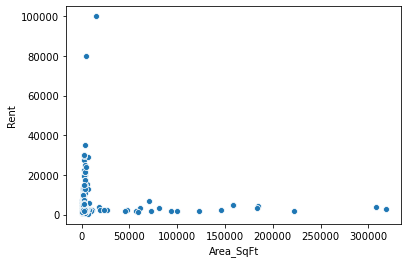

In [40]:
_ = sns.scatterplot(data = df, x = "Area_SqFt", y = "Rent")

Let's explore this later. There are clear outliers. When we explore these outliers we will re-analyze this relationship

## 2A. DATA COLLECTION -  Neighborhood Extrinsic Factors

### DATASET 2 - Neighborhood Extrinsic Factors - data from Department of Housing - NYC

Dataset 2 will be Useful for comparing how **extrinsic factors** that can determine the apartment prices for different Neighborhoods in New York City

- **33 Columns** include - Borough Name, Number of Housing Units, Average Price, Locations of Public Transportation, Diversity of Neighborhood. You can find an explanation of the columns at the end. 
- **Rows** Include the 55 different Neighborhoods.


In [26]:
df2 = pd.read_csv (r'Neighborhoods.csv')
df2.head()

,sub_boro_names,boro_names,median_rent,born_in_new_york_state,car_free_commute,disabled_population,foreign_born_population,housing_units,mean_travel_time_to_work,median_income,...,new_certificates_of_occupancy,public_housing,subsidized_properties,building_age,racial_diversity_index,asian,black,hispanic,white,other_races
0,Astoria,Queens,2125.10,0.42,0.78,0.07,0.43,80598.09,37.04,50605.87,...,387.21,7584.0,57.0,83.252933,0.66,0.136169,0.066390,0.282858,0.479226,0.035356
1,Bay Ridge,Brooklyn,1678.72,0.54,0.65,0.06,0.37,52526.36,42.21,50795.57,...,52.11,0.0,9.0,94.103877,0.55,0.204362,0.011565,0.144371,0.612592,0.027110
2,Bayside/Little Neck,Queens,1962.32,0.54,0.34,0.05,0.40,46390.44,40.51,61084.74,...,86.77,0.0,0.0,72.417602,0.61,0.362974,0.017587,0.109906,0.477049,0.032484
3,Bedford Stuyvesant,Brooklyn,2288.53,0.62,0.79,0.10,0.20,55195.52,41.35,30129.29,...,434.87,9988.0,626.0,102.034872,0.55,0.022872,0.603755,0.187171,0.136842,0.049359
4,Bensonhurst,Brooklyn,1496.61,0.42,0.69,0.06,0.53,66917.95,44.93,39280.36,...,117.70,0.0,8.0,86.888459,0.60,0.336736,0.006405,0.128093,0.503084,0.025682


In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   sub_boro_names                     55 non-null     object 
 1   boro_names                         55 non-null     object 
 2   median_rent                        55 non-null     float64
 3   born_in_new_york_state             55 non-null     float64
 4   car_free_commute                   55 non-null     float64
 5   disabled_population                55 non-null     float64
 6   foreign_born_population            55 non-null     float64
 7   housing_units                      55 non-null     float64
 8   mean_travel_time_to_work           55 non-null     float64
 9   median_income                      55 non-null     float64
 10  population                         55 non-null     float64
 11  population_density                 55 non-null     float64
 

Luckily DataSet 2 was alot cleaner than DataSet 1; which meant not alot of Data Wrangling was necessary. Now the next step will be to combine both datasets.

#### DEFINITION OF COLUMNS

- ***population_density*** - The geographic area’s population divided by its land area.

- ***poverty_rate*** - The number of people below the poverty threshold divided by the number of people for whom poverty status was determined.

- ***labor_force_rate*** - The number of people aged 16 years and older who are in the civilian labor force, divided by the total number of non-institutionalized people aged 16 years and older.

- ***income_diversity_ratio*** - The income earned by the 80th percentile household divided by the income earned by the 20th percentile household for a given geographic area, excluding all households without positive income.

- ***subway*** - The percentage of residential units that are within a ½ mile walk of a station entrance for the New York City Subway, Long Island Rail Road, PATH, Amtrak, Metro-North Railroad, or Staten Island Railway.

- ***park*** - The percentage of residential units that are within a ¼ mile of a park.

- ***crime*** - The number of serious crimes, those classified as a major felony as defined by the New York City Police Department, committed in a given geographic area per 1,000 residents. At the city and borough levels, we report separate rates for serious property and violent crimes. Serious property crimes include most types of burglary, larceny, and motor vehicle theft. Serious violent crime includes most types of assault, murder (including nonnegligent manslaughter), rape, and robbery. For community district rates, we aggregating crime rates we first calculate the crime rate for each precinct. If a community district is entirely within one precinct, then that rate is directly used for the community district. If a community district contains portions of more than one precinct, we weight the crime rate from each precinct based on the share of all housing units within the community district that are in that particular precinct.

### DATASET - merging Zillow Rent Prices with NYC Housing Extrinsic Factors

Below is the categorization of all Zip Codes their pertaining Neighborhood

In [28]:
# Researching Zip Codes and assigning them a Neighborhood:

Astoria = [11101, 11102, 11103, 11104, 11105, 11106]
Bay_Ridge = [11209, 11228]
Bayside_Little_Neck = [11360, 11361, 11364]
Bedford_Stuyvesant = [11205, 11206, 11216, 11221, 11233]
Bensonhurst = [11204, 11214]
Borough_Park = [11204, 11218, 11219, 11220, 11230]
Brooklyn_Heights_Fort_Green = [11201, 11205, 11217]
Brownsville_Ocean_Hill = [11212, 11233]
Bushwick = [11206, 11207, 11221, 11237]
Central_Harlem = [10026, 10027, 10030, 10037, 10039]
Chelsea_Clinton_Midtown = [10026, 10027, 10030, 10037, 10039, 10001, 10010, 10016, 10018, 10019, 10036]
Coney_Island = [11224, 11235]
East_Flatbush = [11203]
East_Harlem = [10029, 10035]
East_New_York = [11207, 11208, 11239]
Elmhurst_Corona = [11369, 11370, 11371, 11368, 11373]
Flatbush = [11226, 11210]
Flatlands_Canarsie = [11234, 11236]
Flushing_Whitestone = [11354, 11355, 11357, 11358, 11356, 11362, 11363, 11366, 11367, 11420, 11422, 11423]
Greenwich_Village = [10003, 10011, 10012, 10014, 10005, 10280, 10281, 10282]
Highbridge = [10452, 10451, 10457, 10458]
Hillcrest = [10977, 11365]
Jackson_eights = [11370, 11372]
Jamaica = [11432, 11433, 11434, 11435, 11436, 11411, 11413, 11415, 11418, 11419, 11420, 11426]
Kingsbridge_Heights_Mosholu = [10463, 10467, 10468, 10464]
Lower_East_Side = [10002, 10006, 10004, 10007, 10013, 10038]
Middle_Village = [11379]
Mid_Island = [11953, 10314]
Morningside_Heights = [10031, 10039, 10025, 10027, 10034]
Morrisania_Belmont = [10456, 10459]
Mott_Haven = [10451, 10454, 10455]
North_Crown_Heights = [11217, 11238]
North_Shore = [11706, 10301, 10302, 10303, 10304, 10305, 10310]
Ozone_Park = [11416, 11417, 11421]
Park_Slope = [11231, 11215, 11217]
Pelham_Parkway = [10461, 10462]
Queens_Village = [11427, 11428, 11429]
Rego_Park = [11374, 11375]
Riverdale = [10463, 10470, 10471, 10472, 10473, 10474, 10475]
Rockaways = [11096, 11690, 11691, 11692, 11693, 11694, 11695, 11697, 11412]
Sheepshead_Bay = [11229, 11223] 
Soundview = [10462, 10460, 10461]
South_Crown_Heights = [11213, 11213, 11216, 11225, 11233]
South_Ozone_Park = [11414]
South_Shore = [10306, 10307, 10308, 10309, 10312]
Stuyvesant_Town = [10009, 10017, 10022, 10080]
Sunnyside_Woodside = [11101, 11104, 11377, 11378, 11385]
Sunset_Park = [11220, 11232]
Throgs_Neck = [10465]
University_Heights = [10453, 10468]
Upper_East_Side = [10021, 10028, 10065, 10075, 10128, 10044]
Upper_West_Side = [10023, 10024, 10025, 10069]
Washington_Heights = [10032, 10033, 10040]
Williamsbridge = [10466, 10467, 10469]
Williamsburg = [11206, 11211, 11249, 11222]

In [29]:
# Converting these Zipcodes into a Dictionary the name as keys, and zipcodes as values

ZipCode = {'Astoria' : Astoria, 'Bay Ridge' : Bay_Ridge, 'Bayside/Little Neck' : Bayside_Little_Neck, 'Bedford Stuyvesant' : Bedford_Stuyvesant, 
           'Bensonhurst' : Bensonhurst, 'Borough Park' : Borough_Park, 'Brooklyn Heights/Fort Greene' : Brooklyn_Heights_Fort_Green, 'Brownsville/Ocean Hill' : Brownsville_Ocean_Hill,
           'Bushwick' : Bushwick, 'Central Harlem' : Central_Harlem, 'Chelsea/Clinton/Midtown' : Chelsea_Clinton_Midtown, 'Coney Island' : Coney_Island,
           'East Flatbush' : East_Flatbush, 'East Harlem' : East_Harlem, 'East New York/Starrett City' : East_New_York, 'Elmhurst/Corona' : Elmhurst_Corona, 
           'Flatbush' : Flatbush, 'Flatlands/Canarsie' : Flatlands_Canarsie, 'Flushing/Whitestone' : Flushing_Whitestone, 'Greenwich Village/Financial District' : Greenwich_Village, 
           'Highbridge/South Concourse' : Highbridge, 'Hillcrest/Fresh Meadows' : Hillcrest, 'Jackson Heights' : Jackson_eights, 'Jamaica' : Jamaica,
           'Kingsbridge Heights/Mosholu' : Kingsbridge_Heights_Mosholu, 'Lower East Side/Chinatown' : Lower_East_Side, 'Middle Village/Ridgewood' : Middle_Village,
           'Mid-Island' : Mid_Island, 'Morningside Heights/Hamilton Heights' : Morningside_Heights, 'Morrisania/Belmont' : Morrisania_Belmont, 'Mott Haven/Hunts Point' : Mott_Haven,
           'North Crown Heights/Prospect Heights' : North_Crown_Heights, 'North Shore' : North_Shore, 'Ozone Park/Woodhaven' : Ozone_Park, 'Park Slope/Carroll Gardens' : Park_Slope,
           'Pelham Parkway' : Pelham_Parkway, 'Queens Village' : Queens_Village, 'Rego Park/Forest Hills' : Rego_Park, 'Riverdale/Kingsbridge' : Riverdale, 'Rockaways': Rockaways, 
           'Sheepshead Bay/Gravesend' : Sheepshead_Bay, 'Soundview/Parkchester' : Soundview, 'South Crown Heights' : South_Crown_Heights, 'South Ozone Park/Howard Beach' : South_Ozone_Park, 
           'South Shore' : South_Shore, 'Stuyvesant Town/Turtle Bay' : Stuyvesant_Town, 'Sunnyside/Woodside' : Sunnyside_Woodside, 'Sunset Park' : Sunset_Park, 'Throgs Neck/Co-op City' : Throgs_Neck,
           'University Heights/Fordham' : University_Heights,  'Upper East Side' : Upper_East_Side, 'Upper West Side': Upper_West_Side, 'Washington Heights/Inwood' : Washington_Heights,
           'Williamsbridge/Baychester' : Williamsbridge, 'Williamsburg/Greenpoint' : Williamsburg}


- *Now we make sure that the number of Neighborhoods above aligns with the number of neighborhoods in the DataSet 2.*

In [30]:
print(len(ZipCode))
print(df2.sub_boro_names.nunique())

55
55


- *Categroizing each apartment with the correct neighborhood, according to the ZipCode*

In [31]:
# Adding the neighborhood to the first DataFrame:

for key in ZipCode:
    for value in ZipCode[key]:
        for code in df.Postal_Code:
            if code == value:
                df.loc[df.Postal_Code == code, 'Neighborhood'] = key

In [32]:
# Finding how many values dont include the Neighborhood: 

sum(df.Neighborhood.isnull())

176

In [33]:
# Finding what Postal Codes do not have a Neighborhood: 

df3 = df[df.Neighborhood.isna()]
print(df3.Postal_Code.unique())

not_NY = [10550, 10704, 11001, 11004, 11509, 11580]

[10550. 10704. 11001. 11004. 11509. 11580.]


 - *Since the Postal Codes that are left over are not in NYC, but instead in Long Island I'll remove these values*

In [34]:
# Dropping all values that are not in the 5 Buroughs: 
df = df[df.Neighborhood.notna()]
df2.rename(columns={'sub_boro_names':'Neighborhood'}, inplace=True)
df.rename(columns={'sub_boro_names':'Neighborhood'}, inplace=True)
df.head()

,longitude,Postal_Code,Unit_Type,Address,Rent,latitude,Home_Type,Bedroom_Num,Bathroom_Num,Area_SqFt,Neighborhood
68,-73.905143,11378.0,Apartment for rent,"6155 60th Pl, Maspeth, NY 11378",2650.0,40.719532,APARTMENT,3.0,1.0,1375.0,Sunnyside/Woodside
80,-73.767100,11361.0,House for rent,"217th St, Bayside, NY 11361",1250.0,40.769070,HOUSE- SINGLE FAMILY,0.0,1.0,550.0,Bayside/Little Neck
87,-73.996217,10001.0,Apartment for rent,"247 W 26th St APT 5B, New York, NY 10001",2500.0,40.747067,HOUSE- MULTI FAMILY,1.0,1.0,500.0,Chelsea/Clinton/Midtown
93,-73.997605,10001.0,Apartment for rent,"358 W 30th St APT 2B, New York, NY 10001",2350.0,40.750397,HOUSE- MULTI FAMILY,0.0,1.0,NaN,Chelsea/Clinton/Midtown
95,-74.001715,10001.0,Apartment for rent,"420 W 25th St APT 7K, New York, NY 10001",5900.0,40.748087,HOUSE- MULTI FAMILY,1.0,1.0,893.0,Chelsea/Clinton/Midtown


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5147 entries, 68 to 6873
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   longitude     5147 non-null   float64
 1   Postal_Code   5147 non-null   float64
 2   Unit_Type     5147 non-null   object 
 3   Address       5147 non-null   object 
 4   Rent          5147 non-null   float64
 5   latitude      5147 non-null   float64
 6   Home_Type     5147 non-null   object 
 7   Bedroom_Num   5147 non-null   float64
 8   Bathroom_Num  5077 non-null   float64
 9   Area_SqFt     2655 non-null   float64
 10  Neighborhood  5147 non-null   object 
dtypes: float64(7), object(4)
memory usage: 482.5+ KB


------------

## 3. Merging both DataFrame - Overall Rent Prices

In [36]:
df = df.merge(df2, how='left')
df.head()

,longitude,Postal_Code,Unit_Type,Address,Rent,latitude,Home_Type,Bedroom_Num,Bathroom_Num,Area_SqFt,...,new_certificates_of_occupancy,public_housing,subsidized_properties,building_age,racial_diversity_index,asian,black,hispanic,white,other_races
0,-73.905143,11378.0,Apartment for rent,"6155 60th Pl, Maspeth, NY 11378",2650.0,40.719532,APARTMENT,3.0,1.0,1375.0,...,423.63,0.0,13.00,80.223531,0.69,0.338447,0.016259,0.337890,0.283209,0.024194
1,-73.767100,11361.0,House for rent,"217th St, Bayside, NY 11361",1250.0,40.769070,HOUSE- SINGLE FAMILY,0.0,1.0,550.0,...,86.77,0.0,0.00,72.417602,0.61,0.362974,0.017587,0.109906,0.477049,0.032484
2,-73.996217,10001.0,Apartment for rent,"247 W 26th St APT 5B, New York, NY 10001",2500.0,40.747067,HOUSE- MULTI FAMILY,1.0,1.0,500.0,...,745.24,2353.0,66.14,92.959860,0.56,0.135238,0.055244,0.144715,0.631512,0.033291
3,-73.997605,10001.0,Apartment for rent,"358 W 30th St APT 2B, New York, NY 10001",2350.0,40.750397,HOUSE- MULTI FAMILY,0.0,1.0,NaN,...,745.24,2353.0,66.14,92.959860,0.56,0.135238,0.055244,0.144715,0.631512,0.033291
4,-74.001715,10001.0,Apartment for rent,"420 W 25th St APT 7K, New York, NY 10001",5900.0,40.748087,HOUSE- MULTI FAMILY,1.0,1.0,893.0,...,745.24,2353.0,66.14,92.959860,0.56,0.135238,0.055244,0.144715,0.631512,0.033291


------------

## 4. Utilizing the Yelp API

Trying to add Yelp Reviews to dataframe! We do not know the popularity of different neighborhoods, hopefully an API like yelp can help redeem this. 

### Saving the DataFrame

In [42]:
# Saving this dataframe

df.to_pickle('df')

In [45]:
df2 = df2[['Neighborhood','boro_names','median_rent','median_income','car_free_commute','population_density','poverty_rate','crime','subway','park','income_diversity_ratio','labor_force_rate']]
df2.to_pickle('Neighborhood')
df2.head()

,Neighborhood,boro_names,median_rent,median_income,car_free_commute,population_density,poverty_rate,crime,subway,park,income_diversity_ratio,labor_force_rate
0,Astoria,Queens,2125.10,50605.87,0.78,33.83,0.17,2.974474,0.73,0.63,4.92,0.68
1,Bay Ridge,Brooklyn,1678.72,50795.57,0.65,32.86,0.15,1.856024,0.74,0.60,5.17,0.62
2,Bayside/Little Neck,Queens,1962.32,61084.74,0.34,12.87,0.07,1.088525,0.21,0.69,4.25,0.63
3,Bedford Stuyvesant,Brooklyn,2288.53,30129.29,0.79,60.33,0.32,7.772004,0.88,0.94,6.77,0.61
4,Bensonhurst,Brooklyn,1496.61,39280.36,0.69,49.38,0.17,1.511147,0.87,0.46,5.19,0.58


------------

## 5. Briefly Exploring the Data

### Distributions Of Feature Value

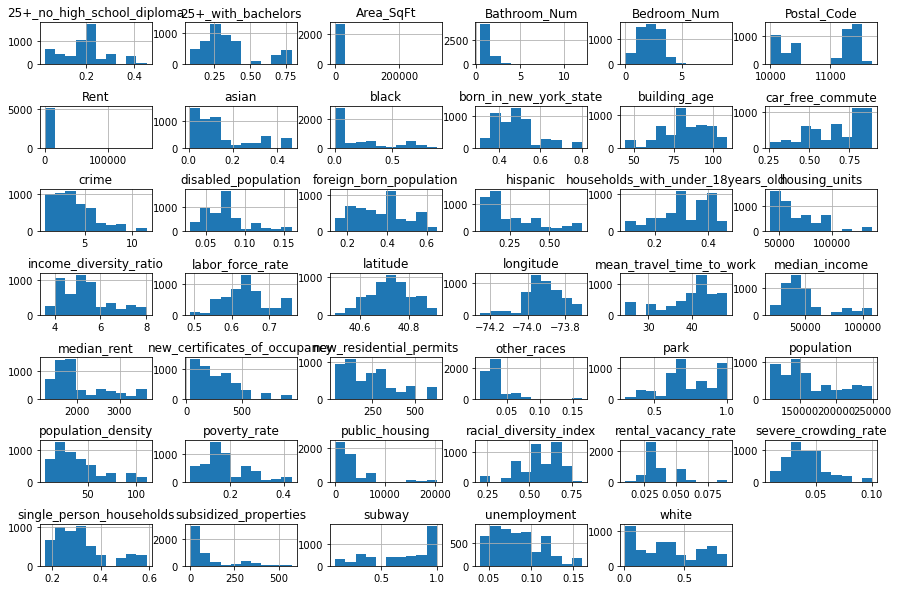

In [48]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=1);

### Distribution of Neighborhood and Buroughs

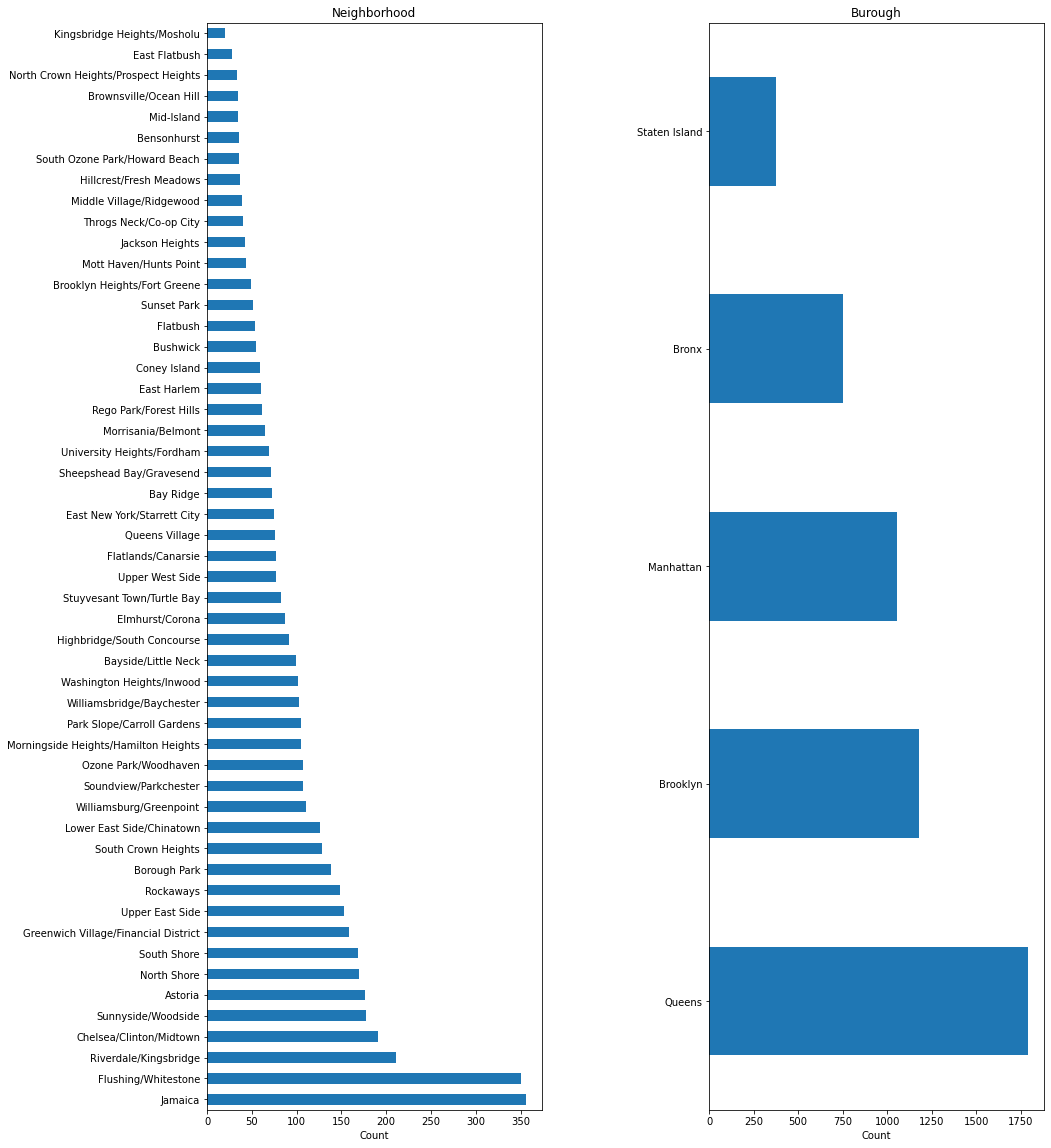

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,20))

df.Neighborhood.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('Neighborhood')
ax[0].set_xlabel('Count')

df.boro_names.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('Burough')
ax[1].set_xlabel('Count')

plt.subplots_adjust(wspace=0.5);

We will explore the data more in the Next Chapter, **Exploratory Data Analysis**